For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

In [2]:
# Set up the environment:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [3]:
df = pd.read_csv('/Users/chichi/Desktop/python/challenge_4/fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df_clean = df[ (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
#df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views

In [72]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(40, 12), dpi=300)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_yticklabels([20000,40000,60000,80000,100000,120000,140000,160000,180000])
    ax.set_ylabel("Page Views")
    sns.set_theme(font_scale=2,style='white')
    sns.lineplot(data=df_clean, legend=False, palette=['#bf0000'],linewidth='2')
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig



/var/folders/z5/k3skf7xd47v_kpnz3xlnx3940000gn/T/ipykernel_15150/2878931031.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([20000,40000,60000,80000,100000,120000,140000,160000,180000])


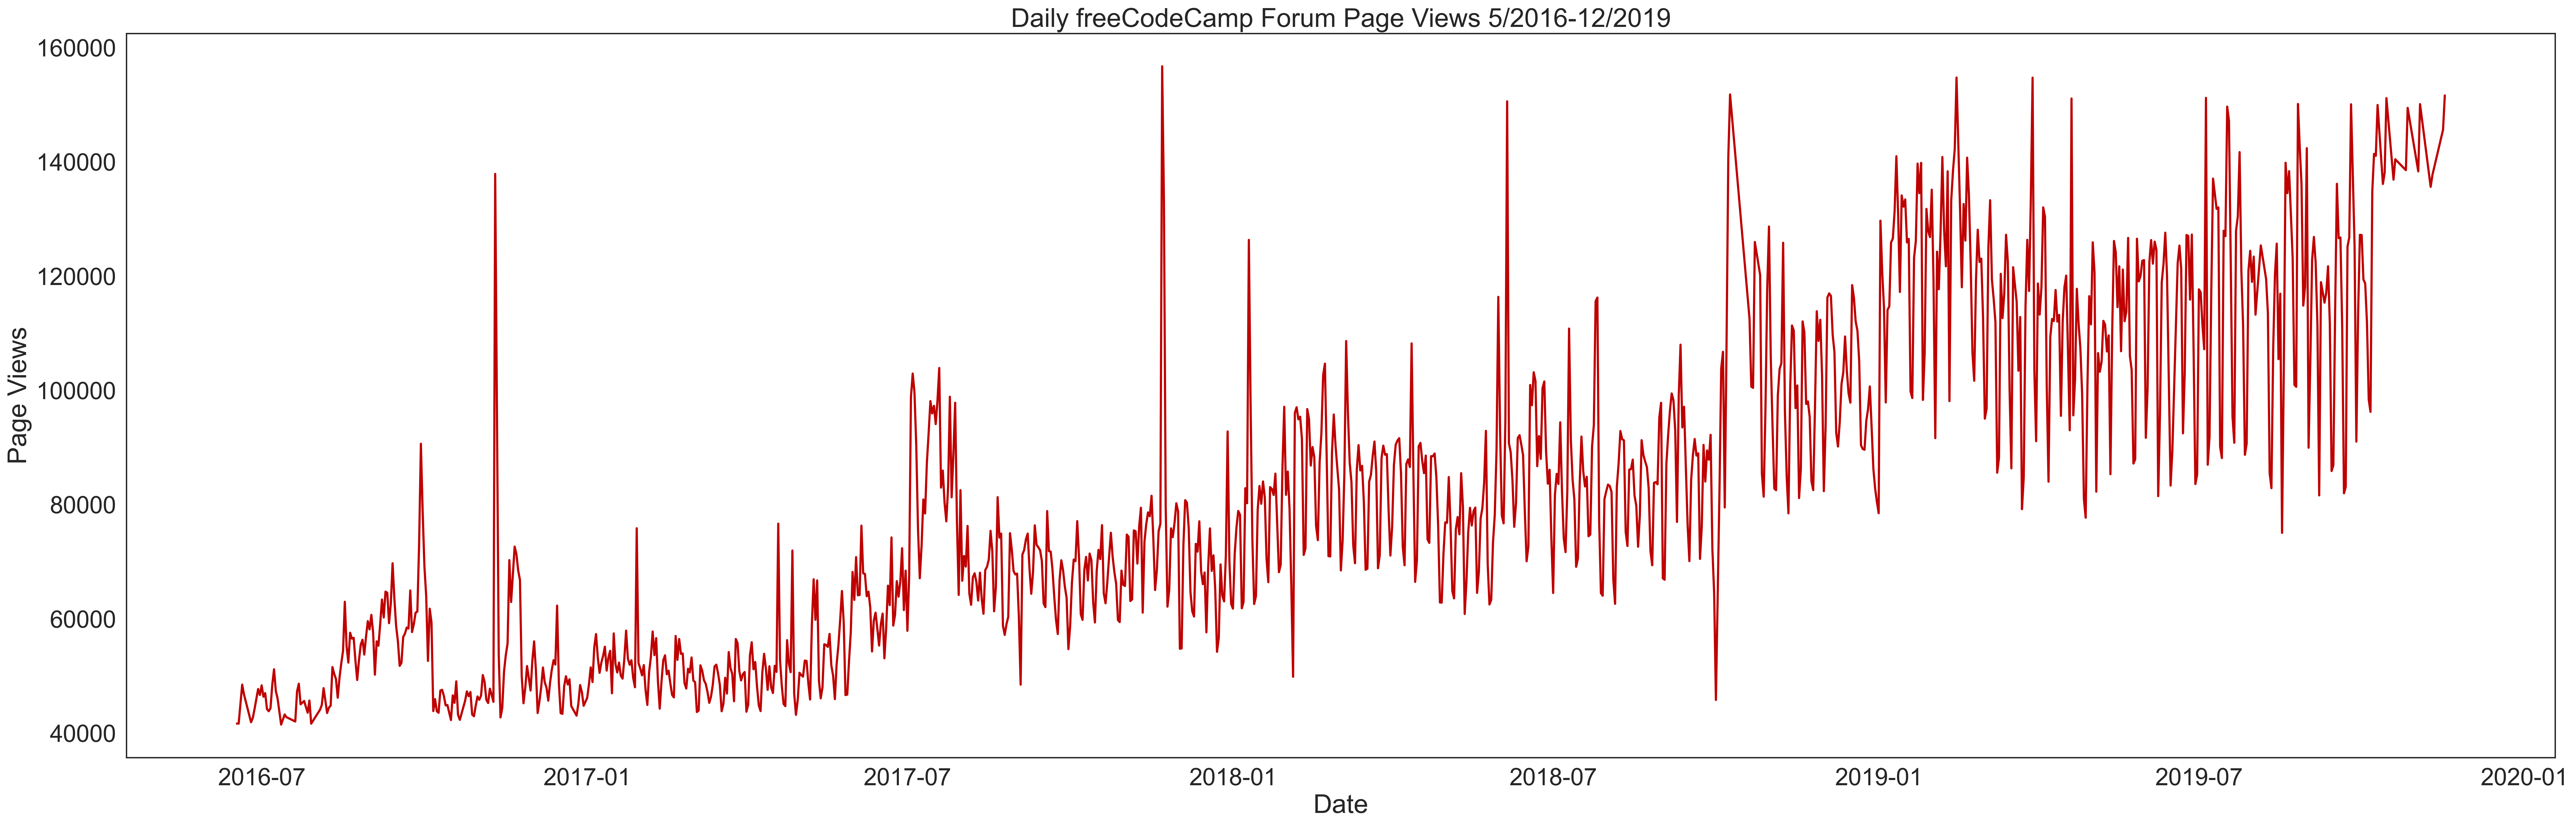

In [73]:
fig, ax = plt.subplots(figsize=(40, 12), dpi=300)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_yticklabels([20000,40000,60000,80000,100000,120000,140000,160000,180000])
ax.set_ylabel("Page Views")
sns.set_theme(font_scale=2,style='white')
sns.lineplot(data=df_clean, legend=False, palette=['#bf0000'],linewidth='2').figure.savefig('lineplot.png')

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [7]:
# Calculate average daily page views for each month grouped by year
df_bar = df_clean.copy()
df_bar['Years'] = df_bar.index.year
df_bar['Months'] = df_bar.index.month_name()
df_bar = df_bar.groupby(['Years','Months']).mean().round().astype(int)
df_bar = df_bar.rename(columns={'value': 'Average Page Views'}).reset_index()

In [20]:
# Handle missing data
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df_bar.reset_index().rename(columns={'value': 'Average Page Views','month': 'Months'})

    # Draw bar plot
    fig, ax = plt.subplots(dpi=300)
    sns.set_theme(font_scale=.5,style='white')
    sns.barplot(df_bar,x= 'Years', y= 'Average Page Views',hue='Months',palette='tab10').legend(fontsize=1,title='Months')
    sns.move_legend(ax,loc='upper left',labels=['January','February','March','April','May','June','July','August','September','October','November','December'])

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

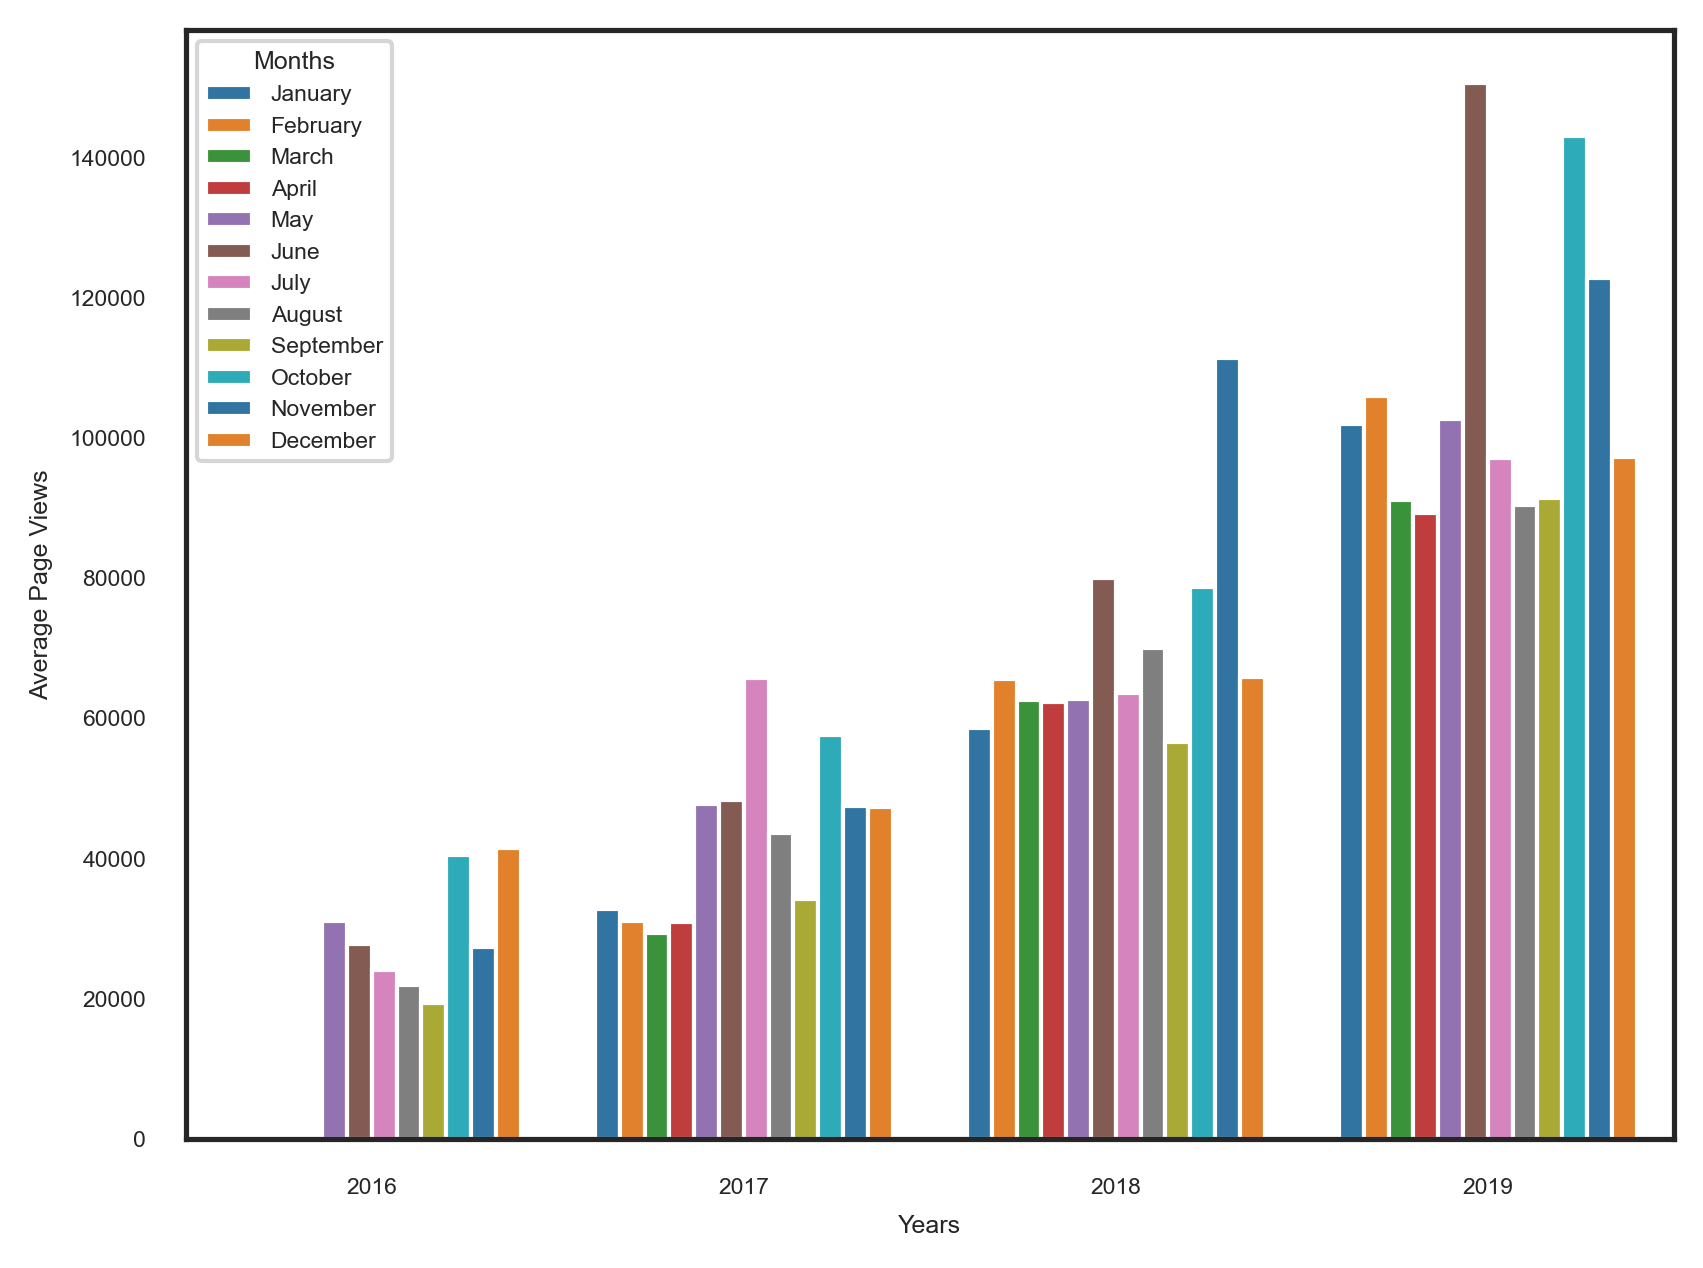

In [21]:
fig, ax = plt.subplots(dpi=300)
sns.set_theme(font_scale=.5,style='white')
sns.barplot(df_bar,x= 'Years', y= 'Average Page Views',hue='Months',palette='tab10').legend(fontsize=1,title='Months')
sns.move_legend(ax,loc='upper left',labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
fig.savefig('barplot.png')

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [53]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df_clean.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(32,10),dpi=200)
    sns.set_theme(style='white',font_scale=1)

    # yearly
    sns.boxplot(data=df_box, x="year", y="value", ax=ax1,palette='tab10',flierprops=dict(marker= 'x'))
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

# monthly
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=ax2,palette='tab10',flierprops=dict(marker= 'x'))
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [30]:
df_box = df_clean.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


/var/folders/z5/k3skf7xd47v_kpnz3xlnx3940000gn/T/ipykernel_16109/3401834001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x="year", y="value", ax=ax1,palette='tab10',flierprops=dict(marker= 'x'))
/var/folders/z5/k3skf7xd47v_kpnz3xlnx3940000gn/T/ipykernel_16109/3401834001.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=ax2,palette='tab10',flierprops=dict(marker= 'x'))


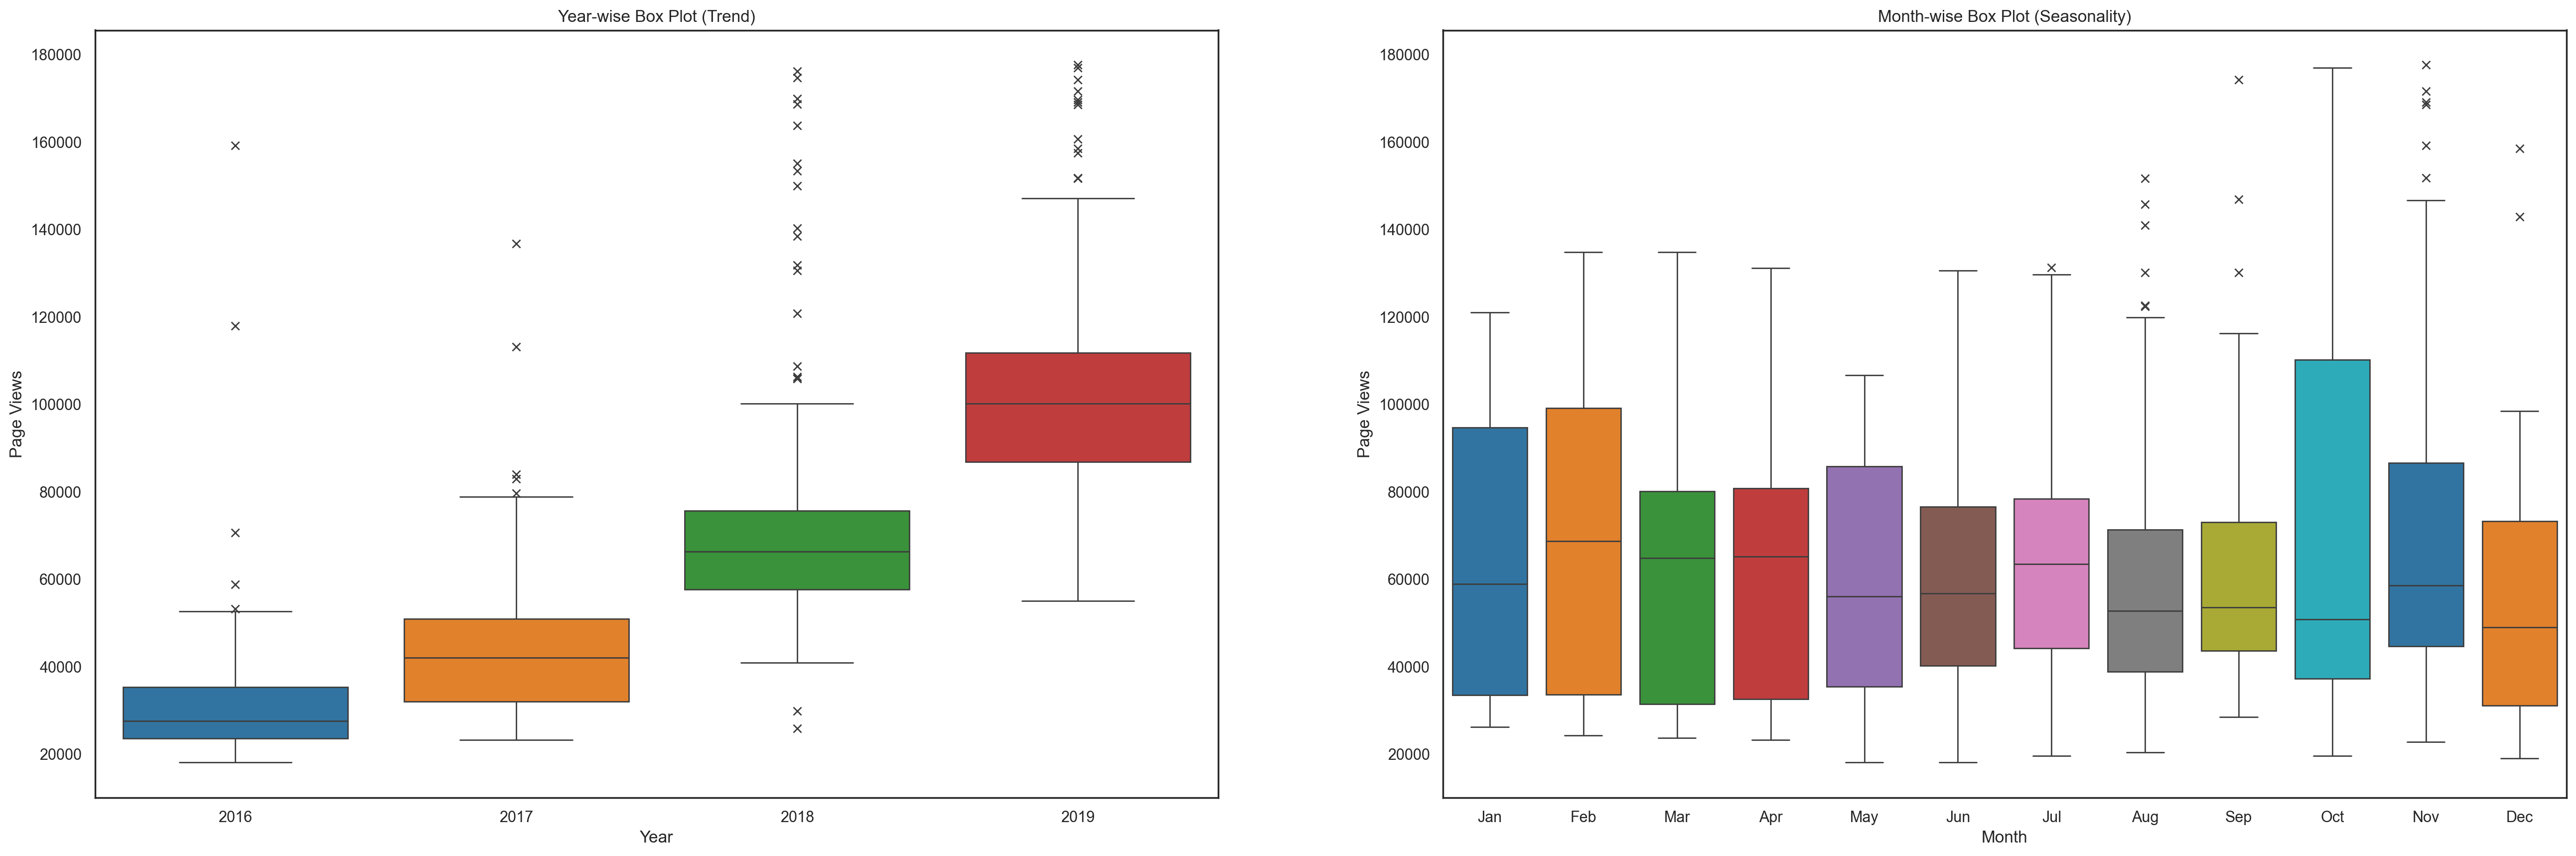

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(32,10),dpi=200)
sns.set_theme(style='white',font_scale=1)

# yearly
sns.boxplot(data=df_box, x="year", y="value", ax=ax1,palette='tab10',flierprops=dict(marker= 'x'))
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")

# monthly
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=ax2,palette='tab10',flierprops=dict(marker= 'x'))
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")

fig.savefig('boxplot.png')